In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline



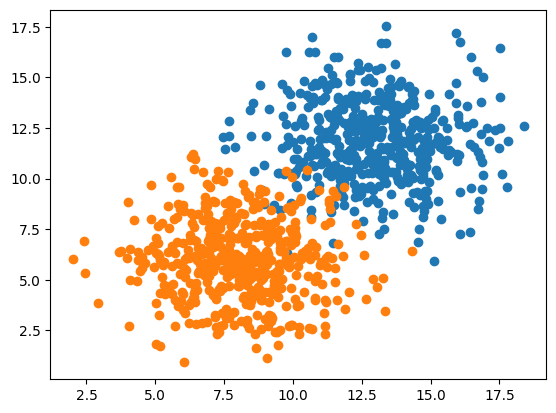

In [ ]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [ ]:
model = Sequential()
model.add(Dense(units = 1, input_shape =(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss ='binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size =50, epochs = 500, shuffle = 'true')

Epoch 1/500
20/20 [==============================] - 0s 1ms/step - loss: 4.5314 - accuracy: 0.4870
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 1.2161 - accuracy: 0.4750
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.7434 - accuracy: 0.5060
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.7340
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8340
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8730
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8910
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.9200
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3012 - accuracy: 0.9400
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.9460
Epoch 11/

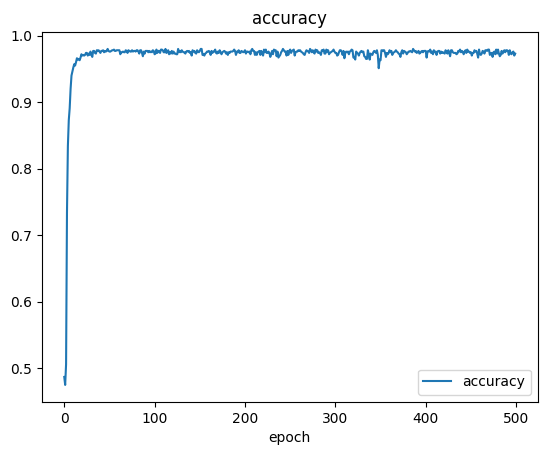

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])


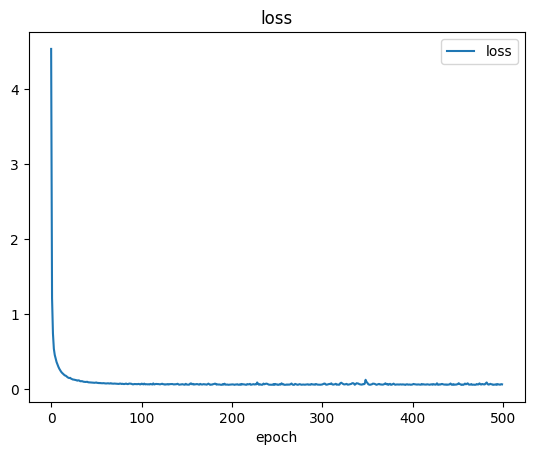

In [ ]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])


In [ ]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

1/1 [==============================] - 0s 25ms/step
prediction is:  [[0.99999595]]


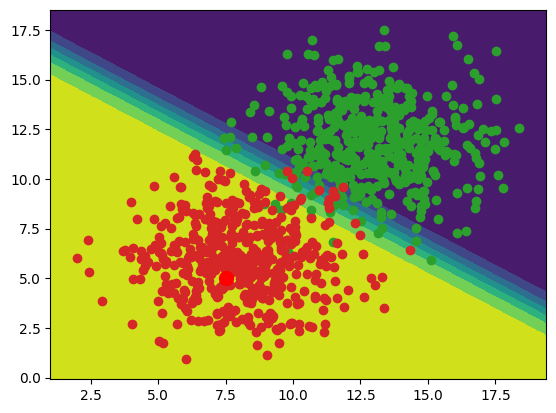

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5


point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)